# POSTTEST 5

    Nama  : Rianawati
    Kelas : C2 20
    NIM   : 2009106132

In [137]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score
# Data Cleaning
from sklearn.impute import SimpleImputer #subtitusi nilai
import warnings
warnings.filterwarnings('ignore')

Record File

In [138]:
df = pd.read_csv("countries of the world.csv")
df.head(2)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"


Informasi Data

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [140]:
df.isna().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

Bersihkan Data 

In [141]:
df_clean = df.copy()

In [142]:
imputer_modus = SimpleImputer(strategy='most_frequent')

In [143]:
df_clean['Literacy (%)'] = imputer_modus.fit_transform(df_clean[['Literacy (%)']])
df_clean['Climate'] = imputer_modus.fit_transform(df_clean[['Climate']])
df_clean['Agriculture'] = imputer_modus.fit_transform(df_clean[['Agriculture']])
df_clean['Industry'] = imputer_modus.fit_transform(df_clean[['Industry']])
df_clean['Service'] = imputer_modus.fit_transform(df_clean[['Service']])
df_clean['Deathrate'] = imputer_modus.fit_transform(df_clean[['Deathrate']])
df_clean['Net migration'] = imputer_modus.fit_transform(df_clean[['Net migration']])
df_clean['Infant mortality (per 1000 births)'] = imputer_modus.fit_transform(df_clean[['Infant mortality (per 1000 births)']])
df_clean['GDP ($ per capita)'] = imputer_modus.fit_transform(df_clean[['GDP ($ per capita)']])
df_clean['Phones (per 1000)'] = imputer_modus.fit_transform(df_clean[['Phones (per 1000)']])
df_clean['Arable (%)'] = imputer_modus.fit_transform(df_clean[['Arable (%)']])
df_clean['Crops (%)'] = imputer_modus.fit_transform(df_clean[['Crops (%)']])
df_clean['Other (%)'] = imputer_modus.fit_transform(df_clean[['Other (%)']])
df_clean['Birthrate'] = imputer_modus.fit_transform(df_clean[['Birthrate']])


dfmodus.isna().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

In [144]:
df_clean.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,227.000000
mean,2.874028e+07,5.982270e+05,9650.660793
std,1.178913e+08,1.790282e+06,10044.226846
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5500.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


Korelasi data

In [145]:
df_clean.corr()

,Population,Area (sq. mi.),GDP ($ per capita)
Population,1.000000,0.469985,-0.038306
Area (sq. mi.),0.469985,1.000000,0.072782
GDP ($ per capita),-0.038306,0.072782,1.000000


In [146]:
data = df_clean[['Population', 'Area (sq. mi.)', 'GDP ($ per capita)']]

In [147]:
data_train, data_test = train_test_split(data,test_size=.2)

Lihat Data 

In [148]:
len(data)

227

Exploratory Data Analysis

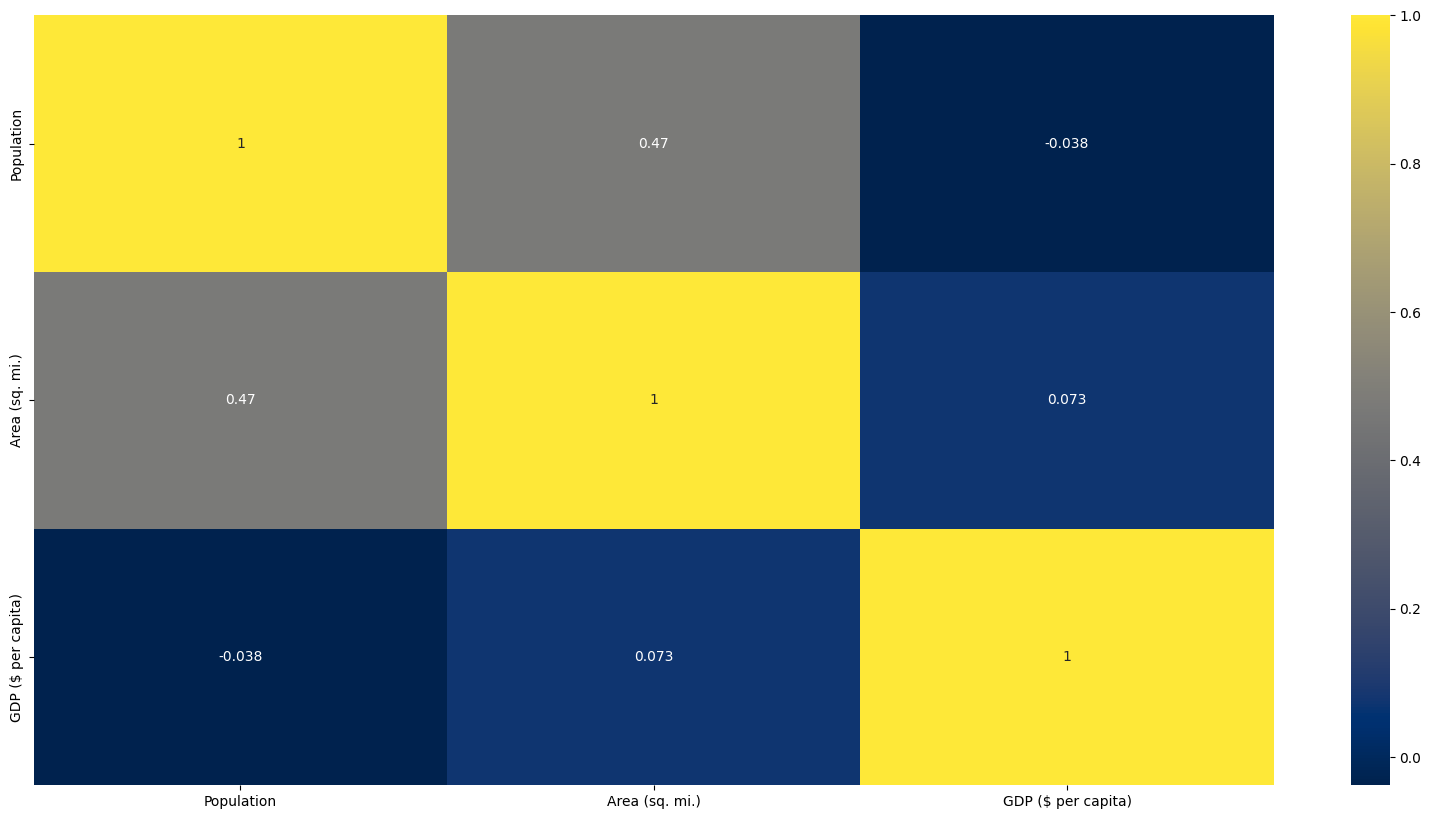

In [149]:
plt.figure(figsize=(20,10))

sns.heatmap(df_clean.corr(),cmap='cividis',annot=True,annot_kws={"size":10})
plt.show()

<Figure size 1000x1000 with 0 Axes>

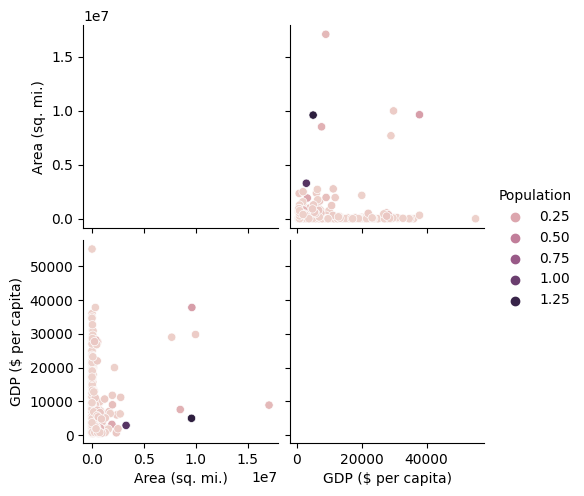

In [150]:
plt.figure(figsize=(10,10))
sns.pairplot(df_clean,hue="Population")
plt.show()

Regresi Split data

In [151]:
data, label = datasets.load_diabetes(return_X_y=True)
data = data[:, np.newaxis, 2]

data_train2 = data[:-50]
data_test2 = data[-50:]

label_train2 = label[:-50]
label_test2 = label[-50:]

Linear Regression

In [152]:
reg = LinearRegression()
reg.fit(data_train2,label_train2)

LinearRegression()

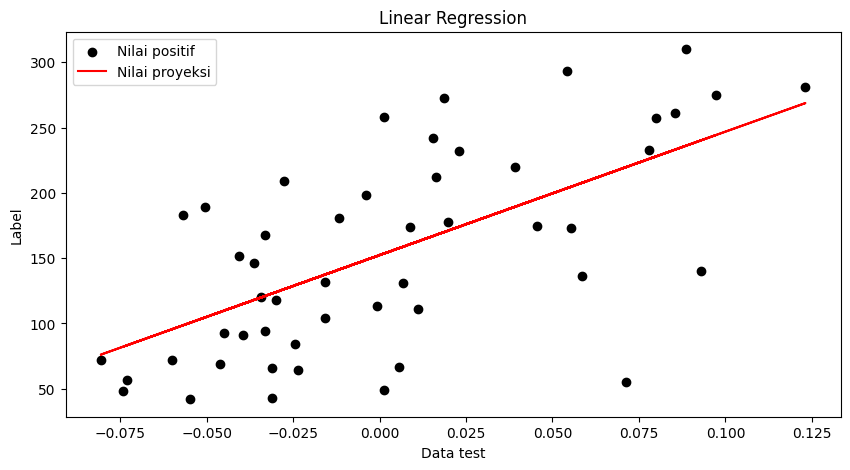

In [153]:
predict_label = reg.predict(data_test2)

plt.figure(figsize=(10,5))

plt.scatter(data_test2, label_test2, color="black",label="Nilai positif")
plt.plot(data_test2, predict_label, color="red",label="Nilai proyeksi")
plt.title('Linear Regression')
plt.xlabel('Data test')
plt.ylabel('Label')
plt.legend(loc ='upper left')
plt.show()

Klasifikasi Data Split

In [154]:
data = df_clean[['Population', 'Area (sq. mi.)', 'GDP ($ per capita)']]
label = df_clean[['Population']]

data_train, data_test, label_train, label_test = train_test_split(data, label, test_size=.2)

KNN Classifier

In [155]:
classifier = KNeighborsClassifier(n_neighbors=5)

In [156]:
classifier.fit(data_train, label_train)

KNeighborsClassifier()

In [157]:
predicted_label = classifier.predict(data_test)

In [160]:
print(f'hasil prediksi : {predicted_label}',
      f'label : {label_test}',
      sep='\n'
     )

hasil prediksi : [131859731   2010347    208869  24385858    400214  60876136   8863338
  17340702    219246    420979  37445392     23098  24385858     57794
 127463611   7523934     13477  40397842   9690222   2022331   2418393
   7385367   3431932    400214     57794   9981334    905949   2976372
   9690222   5213898   8648248  24385858   5231372   8648248  70413958
     20579    400214     89703      7026    168458   5213898  37445392
 142893540  27307134  20222240    690948]
label :      Population
95    245452739
123     2050554
71       274578
161    28302603
122      453125
96     68688433
40      9944201
142    19686505
20       287730
187      552438
8      39921833
119       33987
210    28195754
85        65409
27    188078227
89      8308504
208       21152
211    46710816
205    10175014
222     2460492
102     2758124
13      7961619
46      3702314
55       486530
7         69108
164    10605870
194     1136334
158     3191319
18     10293011
185     5439448
181     939

In [161]:
len(data)

227

In [162]:
dt = DecisionTreeClassifier()
dt.fit(data_train, label_train)

DecisionTreeClassifier()

In [164]:
predict_label = dt.predict(data_test)

In [165]:
akurasi = accuracy_score(label_test, predict_label)

In [166]:
print("Akurasi algoritma Decision Tree dengan default paramater :", {akurasi})

Akurasi algoritma Decision Tree dengan default paramater : {0.0}


In [167]:
print(f'hasil prediksi : {predicted_label}',
      f'label : {label_test}',
      f'akurasi : {akurasi}',
      sep='\n'
     )

hasil prediksi : [131859731   2010347    208869  24385858    400214  60876136   8863338
  17340702    219246    420979  37445392     23098  24385858     57794
 127463611   7523934     13477  40397842   9690222   2022331   2418393
   7385367   3431932    400214     57794   9981334    905949   2976372
   9690222   5213898   8648248  24385858   5231372   8648248  70413958
     20579    400214     89703      7026    168458   5213898  37445392
 142893540  27307134  20222240    690948]
label :      Population
95    245452739
123     2050554
71       274578
161    28302603
122      453125
96     68688433
40      9944201
142    19686505
20       287730
187      552438
8      39921833
119       33987
210    28195754
85        65409
27    188078227
89      8308504
208       21152
211    46710816
205    10175014
222     2460492
102     2758124
13      7961619
46      3702314
55       486530
7         69108
164    10605870
194     1136334
158     3191319
18     10293011
185     5439448
181     939

NAIVE BAYES

In [168]:
gnb  = GaussianNB()
gnb.fit(data_train,label_train)

GaussianNB()

In [169]:
predict_label = gnb.predict(data_test)

In [170]:
akurasi = accuracy_score(label_test, predict_label)

In [171]:
print("Akurasi Naive Bayes dengan default paramater :", {akurasi})

Akurasi Naive Bayes dengan default paramater : {0.0}
